# Trends in Baltimore Arrests Since Freddie Gray

Research questions:  
  
Did the proportion of drug-related arrests increase after Freddie Gray protests/vandalism due to "flood" of drugs?  
Have "cds" charges increased?  
What was the dominant charge during the massive drop in arrests post-riots? (A: curfew violation)  
What time do things get more violent and can we see that time change through the year?   
  
Created by Justin Elszasz, 2015-11-11

#### Important: resample weekly gives the weekly sum for the preceding week ending on that date, not the week ahead.

In [1]:
%pylab inline

import sys
import pandas as pd
import numpy
from datetime import datetime
import time_parser
import import_funcs
#reload(import_funcs)

red_orange = '#FF3300'

Populating the interactive namespace from numpy and matplotlib


In [2]:
BPD_arrests = import_funcs.import_BPDarrests()

# A little bit of processing/clean-up - this breaks 'ChargeDescription' field in two, divided at '||'
BPD_arrests['ChargeDescr1'] = BPD_arrests.ChargeDescription.apply(lambda x: str(x).split('||')[0])
BPD_arrests['ChargeDescr2'] = BPD_arrests.ChargeDescription.apply(lambda x: str(x).split('||')[1] if len(str(x).split('||'))>1 else '')
BPD_arrests.Neighborhood = BPD_arrests.Neighborhood.str.upper()

BPD_arrests.head()

,Arrest,Age,Sex,Race,ArrestLocation,IncidentOffense,IncidentLocation,Charge,ChargeDescription,District,Post,Neighborhood,Location 1,ChargeDescr1,ChargeDescr2
timestamp,,,,,,,,,,,,,,,
2016-01-02 00:47:00,16000242,44,M,W,S CONKLING ST,Unknown Offense,NaN,NaN,Driving Without License,Southeastern,231,CANTON,"(39.2771497510, -76.5665475783)",Driving Without License,
2016-01-02 11:50:00,16000300,54,M,B,700 GLENWOOD AVE,Unknown Offense,700 Glenwood Ave,4 3550,Cds:Possess-Not Marihuana || Cds,Northern,524,WOODBOURNE-MCCABE,"(39.3534309891, -76.6063442127)",Cds:Possess-Not Marihuana,Cds
2016-01-02 17:30:00,16000365,28,M,B,600 DENISON ST,Unknown Offense,600 Denison St,4 3550,Cds:Possess-Not Marihuana || Pwi Cocaine,Southwestern,815,EDGEWOOD,"(39.2945294368, -76.6741877803)",Cds:Possess-Not Marihuana,Pwi Cocaine
2016-01-02 02:24:00,16000249,54,M,B,800 S CATON AVE,4C-Agg. Asslt.- Oth.,S Caton Av & Wilkens Av,1 1415,Asslt-Sec Degree || Aggravated Assault,Southwestern,833,SAINT AGNES,"(39.2751953111, -76.6715796323)",Asslt-Sec Degree,Aggravated Assault
2016-01-02 23:50:00,16000415,35,M,B,5100 REISTERSTOWN RD,Unknown Offense,NaN,NaN,Driving Without License,Northwestern,614,WOODMERE,"(39.3422145407, -76.6825140240)",Driving Without License,


# Top 10 Charge Descriptions in Baltimore

Using field 'ChargeDescr1' (i.e. value of 'ChargeDescription' before '||')

In [3]:
temp = BPD_arrests.groupby('ChargeDescr1').count()
temp.sort('Arrest',ascending=False, inplace=True)
BPD_arrests_top_charges = temp['Arrest'][:10]
BPD_arrests_top_charges

ChargeDescr1
Cds:Possess-Not Marihuana        16510
Asslt-Sec Degree                 14510
Failure To Appear                13330
Cds: Poss Marihuana L/T 10 G      5211
Cds: Possession-Marihuana         3879
Cds:P W/I Dist:Narc               3280
Violation Of Probation            2832
Theft Less Than $100.00           1999
Att-Cds Manuf/Dist-Narc           1976
Asslt-First Degree                1850
Name: Arrest, dtype: int64

In [36]:
a=pd.DataFrame(BPD_arrests.groupby(['ChargeDescr1',BPD_arrests.index.year])['Arrest'].count())
yearlyByType = pd.concat([a.xs(2013,level=1),a.xs(2014,level=1),a.xs(2015,level=1)], axis=1)
yearlyByType.columns = ['arrests13','arrests14','arrests15']


yearlyByType['difference_1314'] = yearlyByType['arrests14'] - yearlyByType['arrests13']
yearlyByType['difference_1415'] = yearlyByType['arrests15'] - yearlyByType['arrests14']
yearlyByType['percent_change_1415'] = 100* (yearlyByType['arrests15'] - yearlyByType['arrests14'])/ yearlyByType['arrests14']
yearlyByType['percent_of_total_difference_1415'] = 100 * yearlyByType['difference_1415'] / sum(yearlyByType['difference_1415'])
yearlyByType.sort('difference_1415', inplace=True, ascending=True)

print 'Total arrests difference between 2014 and 2015: ', int(-1*sum(yearlyByType['difference_1415']))
yearlyByType[yearlyByType['arrests14'] > 100][:20]

Total arrests difference between 2014 and 2015:  10490


,arrests13,arrests14,arrests15,difference_1314,difference_1415,percent_change_1415,percent_of_total_difference_1415
Cds:Possess-Not Marihuana,7375,5746,3372,-1629,-2374,-41.315698,22.631077
Cds: Poss Marihuana L/T 10 G,3387,1818,6,-1569,-1812,-99.669967,17.273594
Failure To Appear,3635,5548,4137,1913,-1411,-25.432588,13.450906
Cds: Possession-Marihuana,2015,1368,493,-647,-875,-63.961988,8.341277
Prostitution-General,639,575,219,-64,-356,-61.913043,3.393708
Theft Less Than $100.00,830,750,416,-80,-334,-44.533333,3.183985
Asslt-Sec Degree,5293,4741,4454,-552,-287,-6.053575,2.735939
Dis.Erly Conduct,681,549,276,-132,-273,-49.726776,2.602479
Cds:P W/I Dist:Narc,1183,1170,926,-13,-244,-20.854701,2.326025
Violation Of Probation,784,1140,906,356,-234,-20.526316,2.230696


In [37]:
(sum(yearlyByType['arrests15'])-sum(yearlyByType['arrests14']))/sum(yearlyByType['arrests14'])

-0.28750947892969342

In [5]:
charges = ['Cds:Possess-Not Marihuana ',
           'Cds:P W/I Dist:Narc ',
           'Asslt-Sec Degree ',
           'Asslt-First Degree ']

Let's look at the proportion of each of those charges out of the total weekly arrests.

In [7]:
baltimoreProportionsWeekly = pd.DataFrame(columns=charges)

for i, charge in enumerate(charges):
    baltimoreProportionsWeekly[charge] = BPD_arrests[BPD_arrests['ChargeDescr1'] == charge]['Arrest'].resample('w', how='count') / BPD_arrests['Arrest'].resample('w', how='count') 

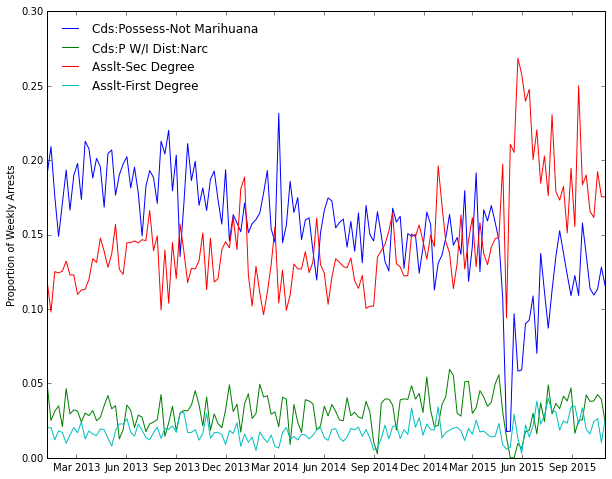

In [9]:
fig = plt.figure(figsize=[10,8])
ax1 = plt.subplot(1,1,1)
plot1 = plot(baltimoreProportionsWeekly.index,baltimoreProportionsWeekly)
legend(charges, loc='upper left', frameon=False)
ylabel('Proportion of Weekly Arrests')

# Total arrests in Baltimore plummeted in the weeks after the "riots," but haven't increased substantially over pre-Freddie Gray numbers.

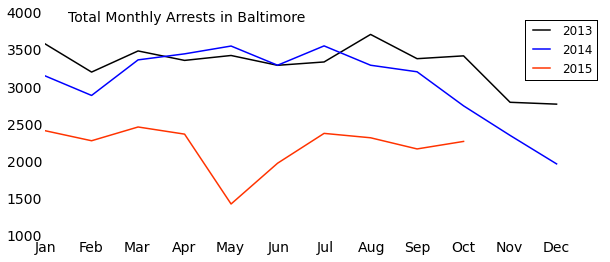

In [10]:
fig = plt.figure(figsize=[10,4])
ax1 = plt.subplot(1,1,1)
linewidth = 1.5

week2013 = BPD_arrests['Arrest'].resample('m',how='count').ix['2013']
week2014 = BPD_arrests['Arrest'].resample('m',how='count').ix['2014']
week2015 = BPD_arrests['Arrest'].resample('m',how='count').ix['2015']

#ylabel('Total Weekly Arrests in Baltimore', fontsize=16)
plot13 = plot(week2013.index.month, week2013, color='k', linewidth=linewidth)
plot14 = plot(week2014.index.month, week2014, color='b', linewidth=linewidth)
plot15 = plot(week2015.index.month, week2015, color=red_orange, linewidth=linewidth)


#text('apr',350,'Total Weekly Arrests in Baltimore', fontsize=16, ha='left', color='k')

# turn off square border around plot
ax1.spines["top"].set_visible(False)  
ax1.spines["bottom"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.spines["left"].set_visible(False)

# turn off ticks
ax1.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="on", left="off", right="off", labelleft="on",labelsize=14)
xlabel('')

#xticks(week2013.rename(index = lambda x: x.strftime('%B')))
ax1.set_xticks(range(1,13))
ax1.set_xticklabels(week2014.rename(index = lambda x: x.strftime('%b')).index)
xlim([1,13])
legend(['2013','2014','2015'])
grid('off')

text(1.5,3900,'Total Monthly Arrests in Baltimore', fontsize=14)

#fig.savefig('plots/Total_Monthly_Arrests.png', bbox_tight='inches')

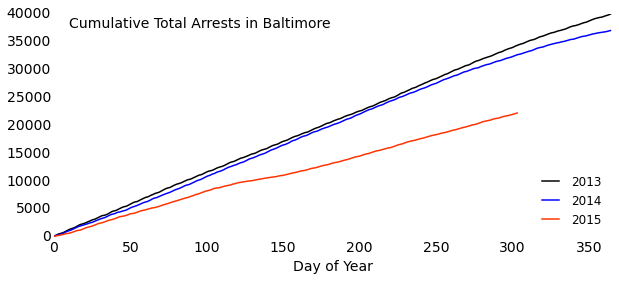

In [1054]:
fig = plt.figure(figsize=[10,4])
ax1 = plt.subplot(1,1,1)
linewidth = 1.5

week2013 = BPD_arrests['Arrest'].resample('d',how='count').ix['2013'].cumsum()
week2014 = BPD_arrests['Arrest'].resample('d',how='count').ix['2014'].cumsum()
week2015 = BPD_arrests['Arrest'].resample('d',how='count').ix['2015'].cumsum()

#ylabel('Total Weekly Arrests in Baltimore', fontsize=16)
plot13 = plot(week2013, color='k', linewidth=linewidth)
plot14 = plot(week2014, color='b', linewidth=linewidth)
plot15 = plot(week2015, color=red_orange, linewidth=linewidth)
#plot14 = plot(week2014.index.month, week2014, color='b', linewidth=linewidth)
#plot15 = plot(week2015.index.month, week2015, color=red_orange, linewidth=linewidth)

# turn off square border around plot
ax1.spines["top"].set_visible(False)  
ax1.spines["bottom"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.spines["left"].set_visible(False)

# turn off ticks
ax1.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="on", left="off", right="off", labelleft="on",labelsize=14)
xlabel('')

#xticks(week2013.rename(index = lambda x: x.strftime('%B')))
#ax1.set_xticks(range(1,13))
#ax1.set_xticklabels(week2014.rename(index = lambda x: x.strftime('%b')).index)
legend(['2013','2014','2015'], loc='lower right', frameon=False)
grid('off')

text(10,37500,'Cumulative Total Arrests in Baltimore', fontsize=14)

xlim([0,365])
xlabel('Day of Year', fontsize=14)

officers_charged = '1-may-2015'

#fig.savefig('plots/Total_Monthly_Arrests_Cumsum.png', bbox_tight='inches')

# Looking only at 'ChargeDescr1' value 'Cds:Possess-Not Marihuana '

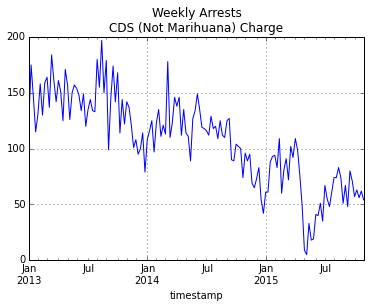

In [19]:
BPD_arrests[BPD_arrests['ChargeDescr1'] == 'Cds:Possess-Not Marihuana ']['Arrest'].resample('w',how='count').plot()
title('Weekly Arrests\nCDS (Not Marihuana) Charge')

Weekly percentage of arrests that are CDS (not marihuana) since 2013.

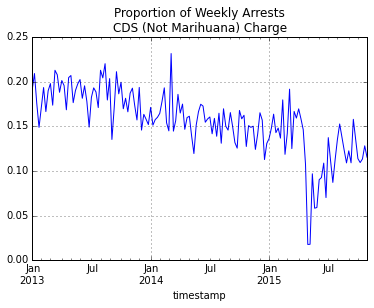

In [18]:
(BPD_arrests[BPD_arrests['ChargeDescr1'] == 'Cds:Possess-Not Marihuana ']['Arrest'].resample('w',how='count')/BPD_arrests['Arrest'].resample('w',how='count')).plot()
title('Proportion of Weekly Arrests\nCDS (Not Marihuana) Charge')

# During week following riots, "Curfew Violation" was the only offense cops cared about.

In [569]:
temp = BPD_arrests.ix['27-apr-2015':'04-may-2015'].groupby('ChargeDescr1').count()
temp.sort('Arrest',inplace=True, ascending=False)
bbb = temp['Arrest'][:10]
bbb

550


ChargeDescr1
Curfew Violation                126
Asslt-Sec Degree                 53
Failure To Appear                37
Burglary-4Th Degree Theft        34
Burglary-4Th Degree-Store        33
Theft: Less $1,000 Value         26
Burglary/2Nd Degree/General      16
Dis.Erly Conduct                 13
Curfew                           12
Violation Of Probation           12
Name: Arrest, dtype: int64

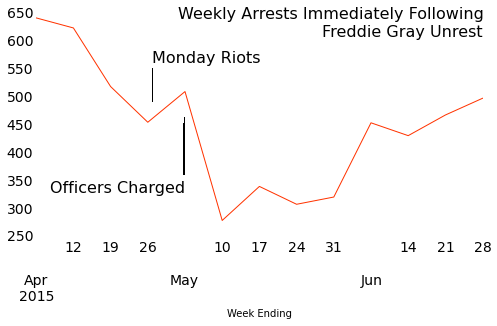

In [980]:
fig = plt.figure(figsize = [8,4])
ax1 = plt.subplot(1,1,1)
BPD_arrests['Arrest'].resample('w', how = 'count').ix['apr-2015':'jun-2015'].plot(color=red_orange)
# turn off square border around plot
ax1.spines["top"].set_visible(False)  
ax1.spines["bottom"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.spines["left"].set_visible(False)

# turn off ticks
ax1.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="on", left="off", right="off", labelleft="on",labelsize=14)
grid('off')
xlabel('Week Ending')

date_protests = '25-apr-2015'

ax1.annotate('Monday Riots',xy=(.26,.6),
             xytext=(.26,.78),
             xycoords = 'axes fraction',
             horizontalalignment='left',
             fontsize=16,
             color='k',
             arrowprops=dict(color='k',
                             width=0.1,
                             headwidth=0.0,
                             shrink=0.05))

ax1.annotate('Officers Charged',xy=(.33,.57),
             xytext=(.33,.2),
             xycoords = 'axes fraction',
             horizontalalignment='right',
             fontsize=16,
             color='k',
             arrowprops=dict(color='k',
                             width=0.1,
                             headwidth=0.0,
                             shrink=0.1))

text('28-jun-2015',610,'Weekly Arrests Immediately Following\nFreddie Gray Unrest', ha='right',fontsize=16)

#fig.savefig('plots/Arrests_Immediately_After_FG.png', bbox_tight='inches')

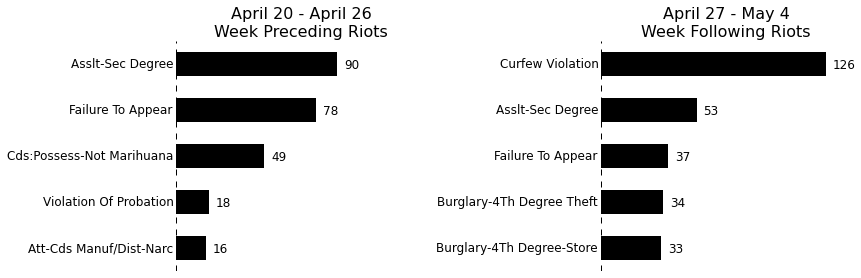

In [11]:
fig = plt.figure(figsize=[12,4])
ax1 = subplot2grid((1,2), (0, 0), colspan=1)
ax2 = subplot2grid((1,2), (0, 1), colspan=1)
aspect = 26
color = 'k'
ann_text = 12

pre = BPD_arrests.ix['20-apr-2015':'26-apr-2015'].groupby('ChargeDescr1').count()
pre.sort('Arrest',inplace=True, ascending=True)
preTop5 = pre['Arrest'][-5:]
ax1.set_xlim([0,140])
preTop5.plot(kind='barh', ax=ax1, color=color)

post = BPD_arrests.ix['27-apr-2015':'04-may-2015'].groupby('ChargeDescr1').count()
post.sort('Arrest',inplace=True, ascending=True)
#print temp['Arrest'].sum()
postTop5 = post['Arrest'][-5:]
ax2.set_xlim([0,140])
postTop5.plot(kind='barh', ax=ax2, color=color)

# turn off square border around plot
ax1.spines["top"].set_visible(False)  
ax1.spines["bottom"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.spines["left"].set_visible(False)

# turn off ticks
ax1.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="off", left="off", right="off", labelleft="on",labelsize=ann_text)
ax1.grid('off')

# turn off square border around plot
ax2.spines["top"].set_visible(False)  
ax2.spines["bottom"].set_visible(False)  
ax2.spines["right"].set_visible(False)  
ax2.spines["left"].set_visible(False)

# turn off ticks
ax2.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="off", left="off", right="off", labelleft="on",labelsize=ann_text)
ax2.grid('off')

# Annotate with the value for each bar
for p in ax1.patches:
    ax1.annotate(str(p.get_width()), (p.get_width() + 5, p.get_y() + .15), fontsize=ann_text)

for p in ax2.patches:
    ax2.annotate(str(p.get_width()), (p.get_width() + 5, p.get_y() + .15), fontsize=ann_text)

# Turn off y-axis label
ax1.set_ylabel('')
ax2.set_ylabel('')

# Titles for each plot
ax2.set_title('April 27 - May 4\nWeek Following Riots', fontsize=16)
ax1.set_title('April 20 - April 26\nWeek Preceding Riots', fontsize=16)
plt.tight_layout()
#fig.savefig('plots/Top5_Arrest_Counts.png', bbox_tight='inches')

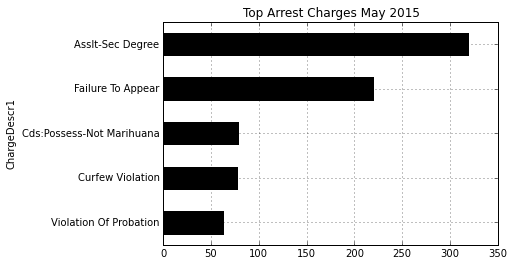

In [13]:
may2015 = BPD_arrests.ix['may-2015'].groupby('ChargeDescr1').count()
may2015.sort('Arrest',inplace=True, ascending=True)
may2015Top5 = may2015['Arrest'][-5:]
ax1.set_xlim([0,140])
may2015Top5.plot(kind='barh', color=color)
title('Top Arrest Charges May 2015')

# First degree assault charges increased after the "riots," but not substantially as compared to 2013.

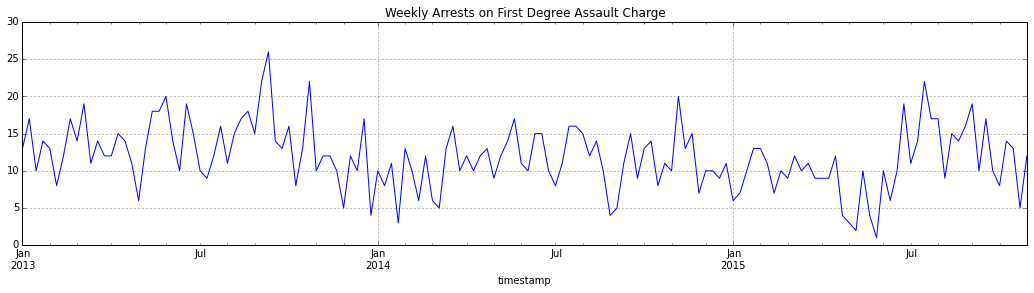

In [17]:
BPD_arrests[BPD_arrests['ChargeDescr1'] == 'Asslt-First Degree ']['Arrest'].resample('w',how='count').plot(figsize=[18,4])
title('Weekly Arrests on First Degree Assault Charge')

# Drug-related offenses continue same downward trend as preceded the "riots."

Commissioner Batts claimed that during the riots enough prescription drugs had been stolen to keep Baltimore "high for a year."  So have the arrests with charge descriptions containing "cds" (controlled dangerous substance) increased since then?  No.  They've continued their downward trend over the last 2 years, with the exception of two downward spikes, one of which correlates with the Baltimore Curfew of 2015.<br><br>

This is any arrest where the field "ChargeDescription" contains the letters "cds"

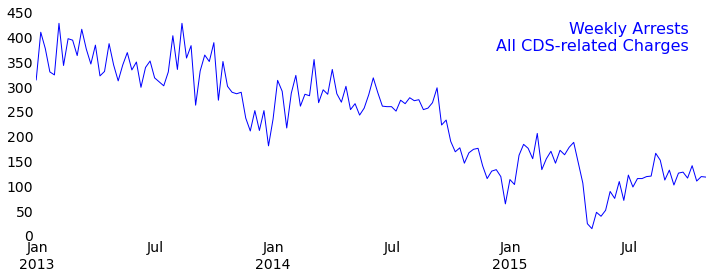

In [564]:
fig = plt.figure(figsize=[12,4])
ax1 = plt.subplot(1,1,1)

temp= BPD_arrests['ChargeDescription'].dropna()
temp[temp.str.contains('cds', case=False)].resample('w', how='count').plot(linewidth=1)
#ylabel('Monthly Number of Arrests\nCDS-related Charge', fontsize=14)
text('oct-2015',375,'Weekly Arrests\nAll CDS-related Charges', fontsize=16, ha='right', color='b')

# turn off square border around plot
ax1.spines["top"].set_visible(False)  
ax1.spines["bottom"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.spines["left"].set_visible(False)

# turn off ticks
ax1.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="on", left="off", right="off", labelleft="on",labelsize=14)
xlabel('')

grid('off')

#fig.savefig('plots/Weekly_CDS_Arrests.png', bbox_tight='inches')

Has the proportion of drug-related arrests increased or decreased over-time/after F.G. vandalism?  Dropped over time, from almost half to about a quarter.

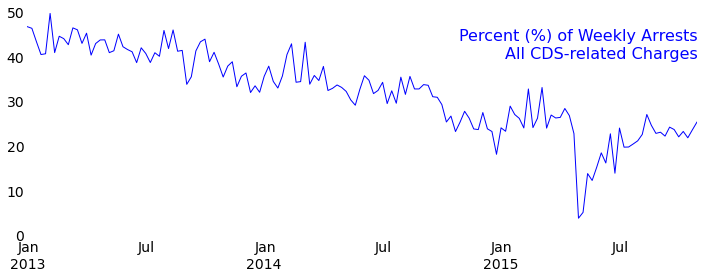

In [16]:
fig = plt.figure(figsize=[12,4])
ax1 = plt.subplot(1,1,1)

temp= BPD_arrests['ChargeDescription'].dropna()
(100*temp[temp.str.contains('cds', case=False)].resample('w', how='count')/temp.resample('w',how='count')).plot(color='b')
text('Nov-2015',40,'Percent (%) of Weekly Arrests\nAll CDS-related Charges', fontsize=16, ha='right', color='b')

# turn off square border around plot
ax1.spines["top"].set_visible(False)  
ax1.spines["bottom"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.spines["left"].set_visible(False)

# turn off ticks
ax1.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="on", left="off", right="off", labelleft="on",labelsize=14)
xlabel('')

grid('off')

#fig.savefig('plots/Percent_Weekly_CDS.png', bbox_tight='inches')

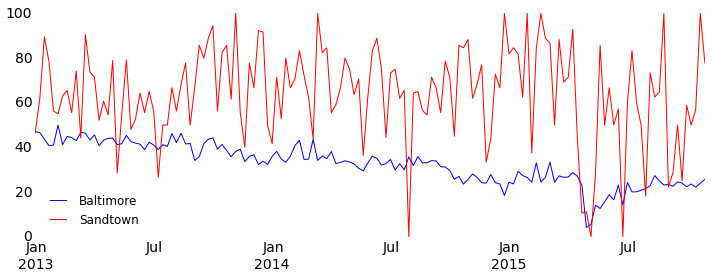

In [104]:
fig = plt.figure(figsize=[12,4])
ax1 = plt.subplot(1,1,1)

temp= BPD_arrests['ChargeDescription'].dropna()
(100*temp[temp.str.contains('cds', case=False)].resample('w', how='count')/
        temp.resample('w',how='count')).plot(color='b',
                                             label='Baltimore')


temp2 = BPD_arrests.dropna(subset=['Neighborhood', 'ChargeDescription'])
temp2sand = temp2[ temp2.Neighborhood.str.contains('sandtown', case=False) ]['ChargeDescription']
(100*temp2sand[temp2sand.str.contains('cds', case=False)].resample('w', how='count')/
        temp2sand.resample('w',how='count')).plot(color='r',
                                                  label='Sandtown')

# turn off square border around plot
ax1.spines["top"].set_visible(False)  
ax1.spines["bottom"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.spines["left"].set_visible(False)

# turn off ticks
ax1.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="on", left="off", right="off", labelleft="on",labelsize=14)
xlabel('')
legend(frameon=False, loc='lower left')
grid('off')



#fig.savefig('plots/Percent_Weekly_CDS.png', bbox_tight='inches')

# Guns

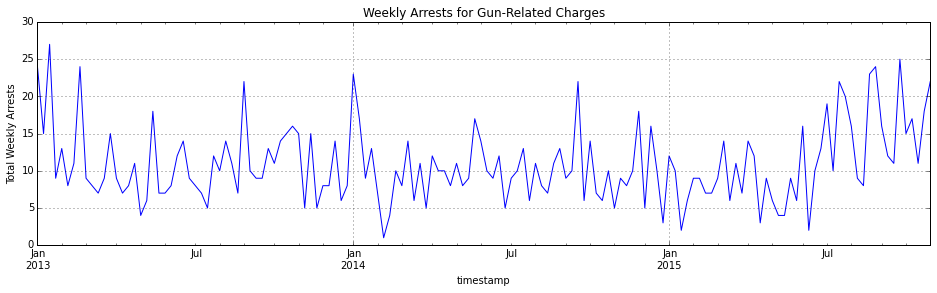

In [15]:
temp= BPD_arrests['ChargeDescription'].dropna()
temp[temp.str.contains('gun', case=False)].resample('w', how='count').plot(figsize=[16,4])
ylabel('Total Weekly Arrests')
title('Weekly Arrests for Gun-Related Charges')

### Gun-related charges as a proportion of all charges have increased substantially since Freddie Gray.

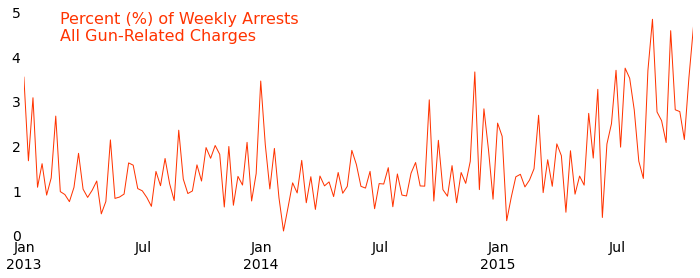

In [14]:
fig = plt.figure(figsize=[12,4])
ax1 = plt.subplot(1,1,1)


temp= BPD_arrests['ChargeDescription'].dropna()
(100*temp[temp.str.contains('gun', case=False)].resample('w', how='count')/temp.resample('w',how='count')).plot(color=red_orange,linewidth=1)
text('mar-2013',4.4,'Percent (%) of Weekly Arrests\nAll Gun-Related Charges', fontsize=16, color=red_orange)

# turn off square border around plot
ax1.spines["top"].set_visible(False)  
ax1.spines["bottom"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.spines["left"].set_visible(False)

# turn off ticks
ax1.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="on", left="off", right="off", labelleft="on",labelsize=14)
xlabel('')

grid('off')

#fig.savefig('plots/Percent_Weekly_Guns.png', bbox_tight='inches')

(1, 35)

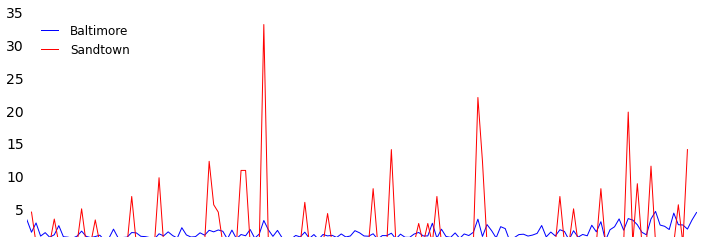

In [113]:
fig = plt.figure(figsize=[12,4])
ax1 = plt.subplot(1,1,1)

temp= BPD_arrests['ChargeDescription'].dropna()
(100*temp[temp.str.contains('gun', case=False)].resample('w', how='count')/
        temp.resample('w',how='count')).plot(color='b',
                                             label='Baltimore',
                                             kind='line')


temp2 = BPD_arrests.dropna(subset=['Neighborhood', 'ChargeDescription'])
temp2sand = temp2[ temp2.Neighborhood.str.contains('sandtown', case=False) ]['ChargeDescription']
(100*temp2sand[temp2sand.str.contains('gun', case=False)].resample('w', how='count')/
        temp2sand.resample('w',how='count')).plot(color='r',
                                                  label='Sandtown',
                                                  kind='line')

# turn off square border around plot
ax1.spines["top"].set_visible(False)  
ax1.spines["bottom"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.spines["left"].set_visible(False)

# turn off ticks
ax1.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="off", left="off", right="off", labelleft="on",labelsize=14)
xlabel('')
legend(frameon=False, loc='upper left')
grid('off')
ylim([1,35])

# Police Productivity

Just to be sure, I'm using records only through September 2015 to ensure any possible incomplete or not-yet-present records in October don't skew the results.  2015 number is predicted using the average unmber of daily arrests through September and extrapolated for the rest of the year.)

In [446]:
policeProductivity = pd.DataFrame(index=['2013','2014','2015'],columns=['Arrests','Officers'])
policeProductivity['Arrests'].ix['2013'] = BPD_arrests['Arrest'].ix['2013'].count()
policeProductivity['Arrests'].ix['2014'] = BPD_arrests['Arrest'].ix['2014'].count()
policeProductivity['Arrests'].ix['2015'] = round(BPD_arrests['Arrest'].ix['jan-2015':'sept-2015'].count() * 365.0/float(len(BPD_arrests['Arrest'].ix['jan-2015':'sept-2015'].resample('d', how='count'))),0)

In [447]:
# Import datasets for each year

sal14 = pd.read_csv('raw_data/Baltimore_City_Employee_Salaries_FY2014.csv',index_col=0)
sal13 = pd.read_csv('raw_data/Baltimore_City_Employee_Salaries_FY2013.csv',index_col=0,names=sal14.columns,skiprows=0)
sal15 = pd.read_csv('raw_data/Baltimore_City_Employee_Salaries_FY2015.csv',index_col=0)

# For some awful reason the 2013 is labeled differently 
sal13['Agency'] = sal13['Agency'].str.replace(r'Police Department.+', 'Police Department ')

# Select only police department employees
all_police13 = sal13[sal13['Agency']=='Police Department ']
all_police14 = sal14[sal14['Agency']=='Police Department ']
all_police15 = sal15[sal15['Agency'].str.contains('Police Department')]

In [462]:
def police_groups(all_police):
    officers = all_police[all_police['JobTitle'].str.contains('police officer',case=False)]
    other_police= all_police[all_police['JobTitle'].str.contains('police officer',case=False) == False]
    return officers, other_police

In [463]:
officers13, other_police13 = police_groups(all_police13)
officers14, other_police14 = police_groups(all_police14)
officers15, other_police15 = police_groups(all_police15)

In [464]:
policeProductivity['Officers'].ix['2013'] = len(officers13)
policeProductivity['Officers'].ix['2014'] = len(officers14)
policeProductivity['Officers'].ix['2015'] = len(officers15)

In [481]:
policeProductivity['annualPerOff'] = (policeProductivity['Arrests'] / policeProductivity['Officers']).apply(lambda x: round(x,1))

In [482]:
policeProductivity

,Arrests,Officers,annualPerOff
2013,39905,2316,17.2
2014,36963,2278,16.2
2015,26613,2224,12.0


In [13]:
fig = plt.figure(figsize=[12,4])
ax1 = plt.subplot(1,1,1)

temp= BPD_arrests['ChargeDescription'].dropna()
(100*temp[temp.str.contains('cds', case=False)].resample('w', how='count')/temp.resample('w',how='count')).plot(color='b')
text('Nov-2015',40,'Percent (%) of Weekly Arrests\nAll CDS-related Charges', fontsize=16, ha='right', color='b')

# turn off square border around plot
ax1.spines["top"].set_visible(False)  
ax1.spines["bottom"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.spines["left"].set_visible(False)

# turn off ticks
ax1.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="on", left="off", right="off", labelleft="on",labelsize=14)
xlabel('')

grid('off')

#fig.savefig('plots/Percent_Weekly_CDS.png', bbox_tight='inches')

In [139]:
a=list(BPD_arrests.Neighborhood.unique())
print pd.Series(sort(a))

0                   ABELL
1               ALLENDALE
2                 ARCADIA
3               ARLINGTON
4       ARMISTEAD GARDENS
5               ASHBURTON
6     BALTIMORE HIGHLANDS
7                 BARCLAY
8            BARRE CIRCLE
9                 BAYVIEW
10             BEECHFIELD
11          BELAIR-EDISON
12        BELAIR-PARKSIDE
13              BELVEDERE
14                  BEREA
...
265          WILHELM PARK
266           WILSON PARK
267            WINCHESTER
268         WINDSOR HILLS
269        WINSTON-GOVANS
270             WOODBERRY
271    WOODBOURNE HEIGHTS
272     WOODBOURNE-MCCABE
273              WOODMERE
274              WRENLANE
275            WYMAN PARK
276             WYNDHURST
277          YALE HEIGHTS
278         YORK-HOMELAND
279                   nan
Length: 280, dtype: object


280